In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# make the dataset
N = 1000
X = np.random.random((N, 2)) *6 - 3  # uniformly distrbuted between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:
                              y=cos(2x) + cos(3x)

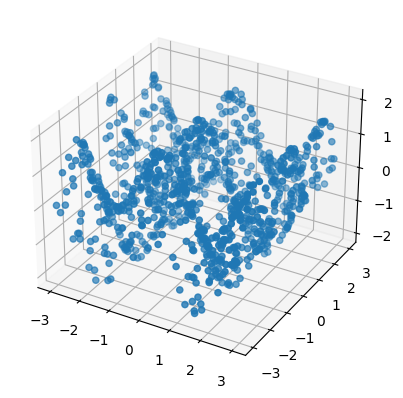

In [5]:
# plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()